# Langchain introduction

Learnt from https://www.youtube.com/watch?v=nAmC7SoVLd8&t=1961s

- Langchain is the framework that allows us to build an application of top of LLM(Large Language Model)
- Chatgpt internally uses the openai api which uses LLM(large Language Models) -> GPT 3.5 , GPT4 
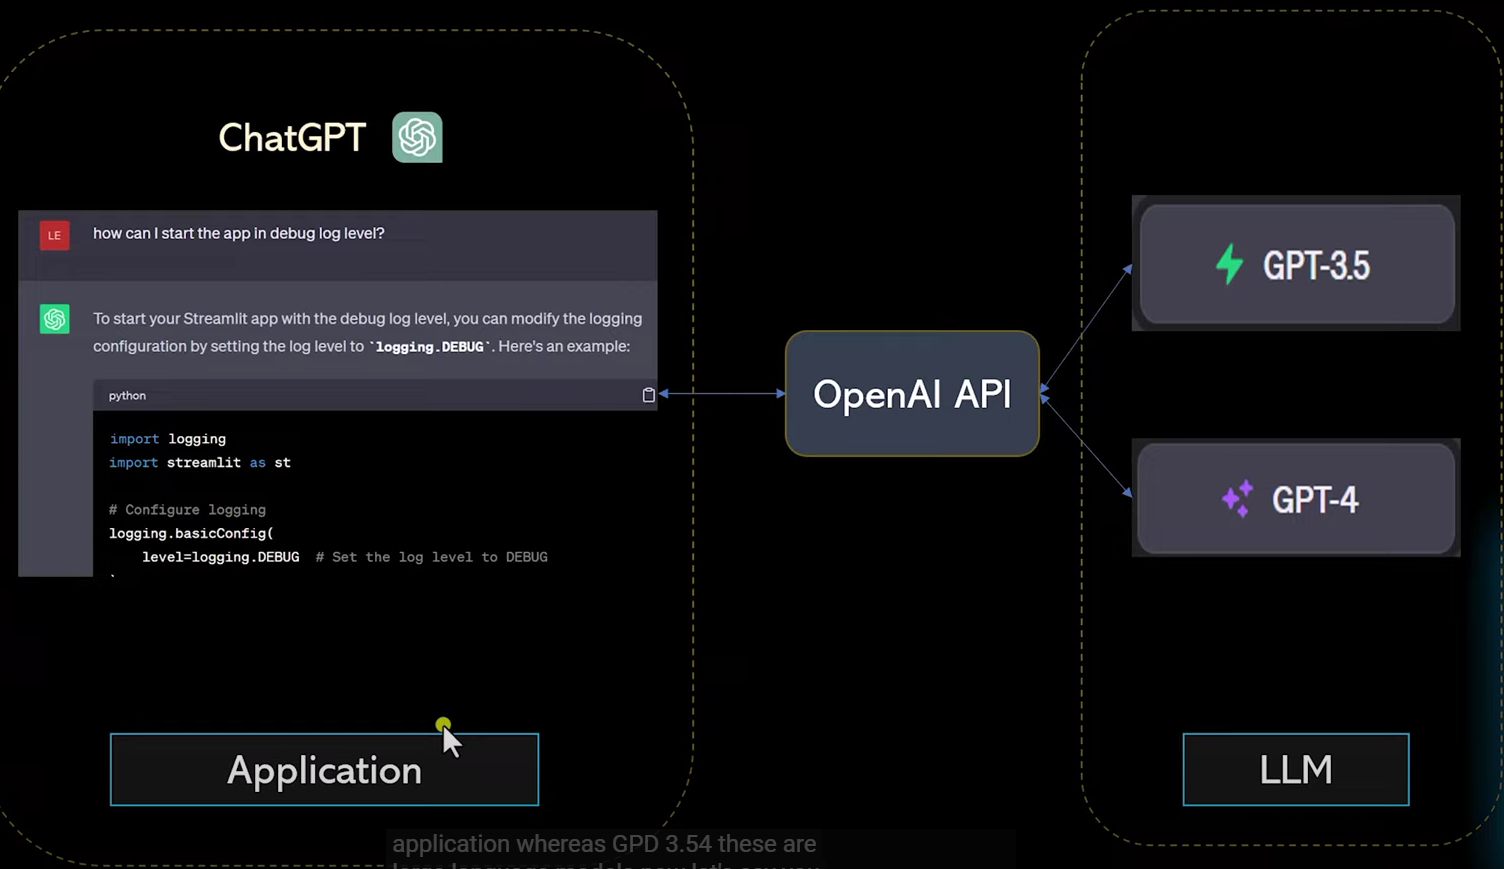
- Chatgpt itself is not an LLM it is an application which calls upon the LLM wheras Gpt 3.5 and 4 are LLMs
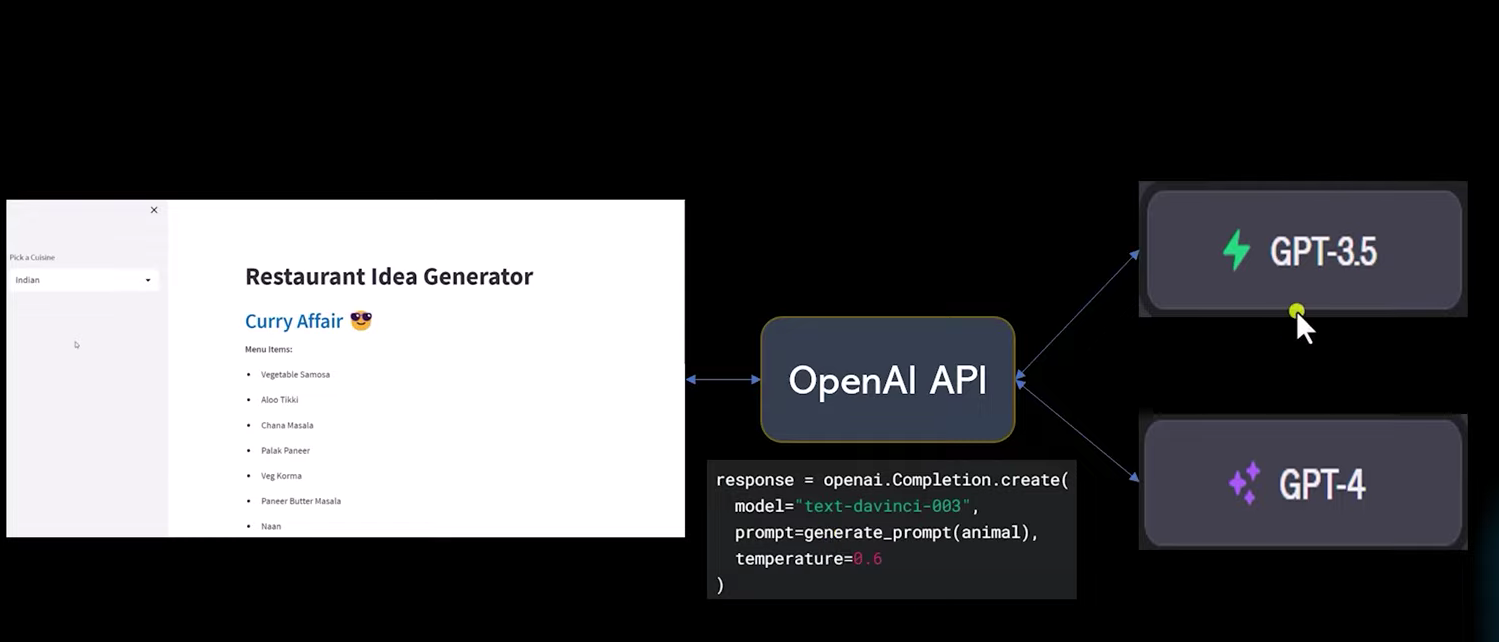

**Limitations of using chatgpt**
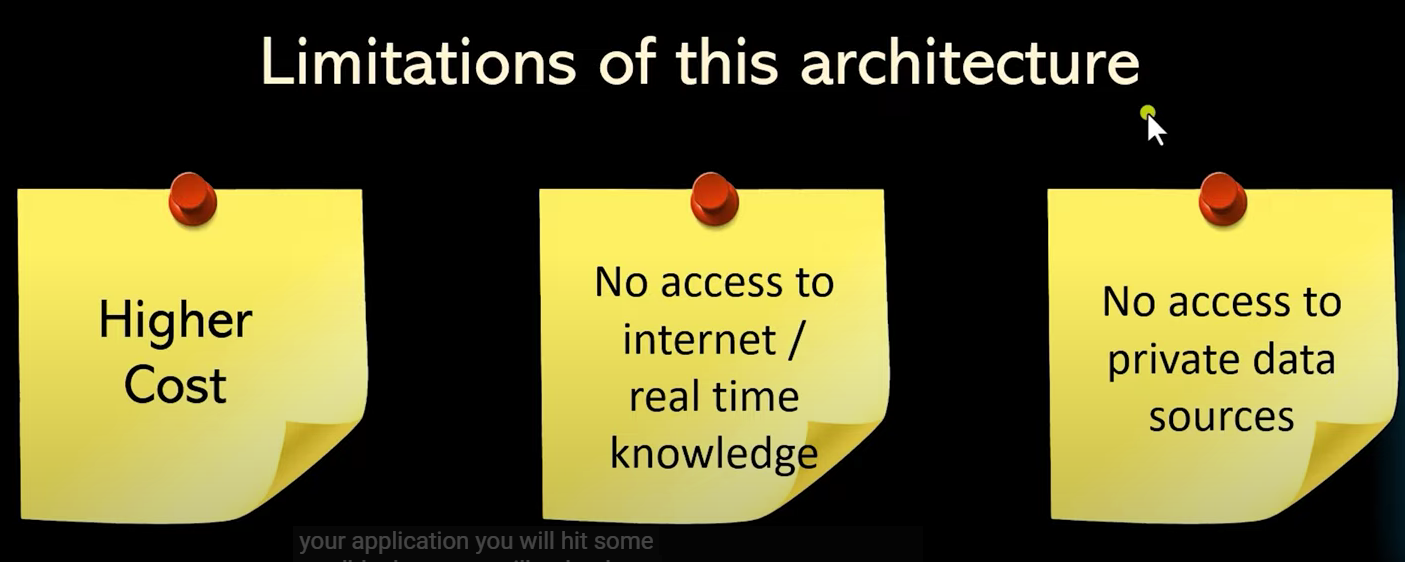

***Langchain*** is a framweork that allows us to build applications using LLMs is known as langchain
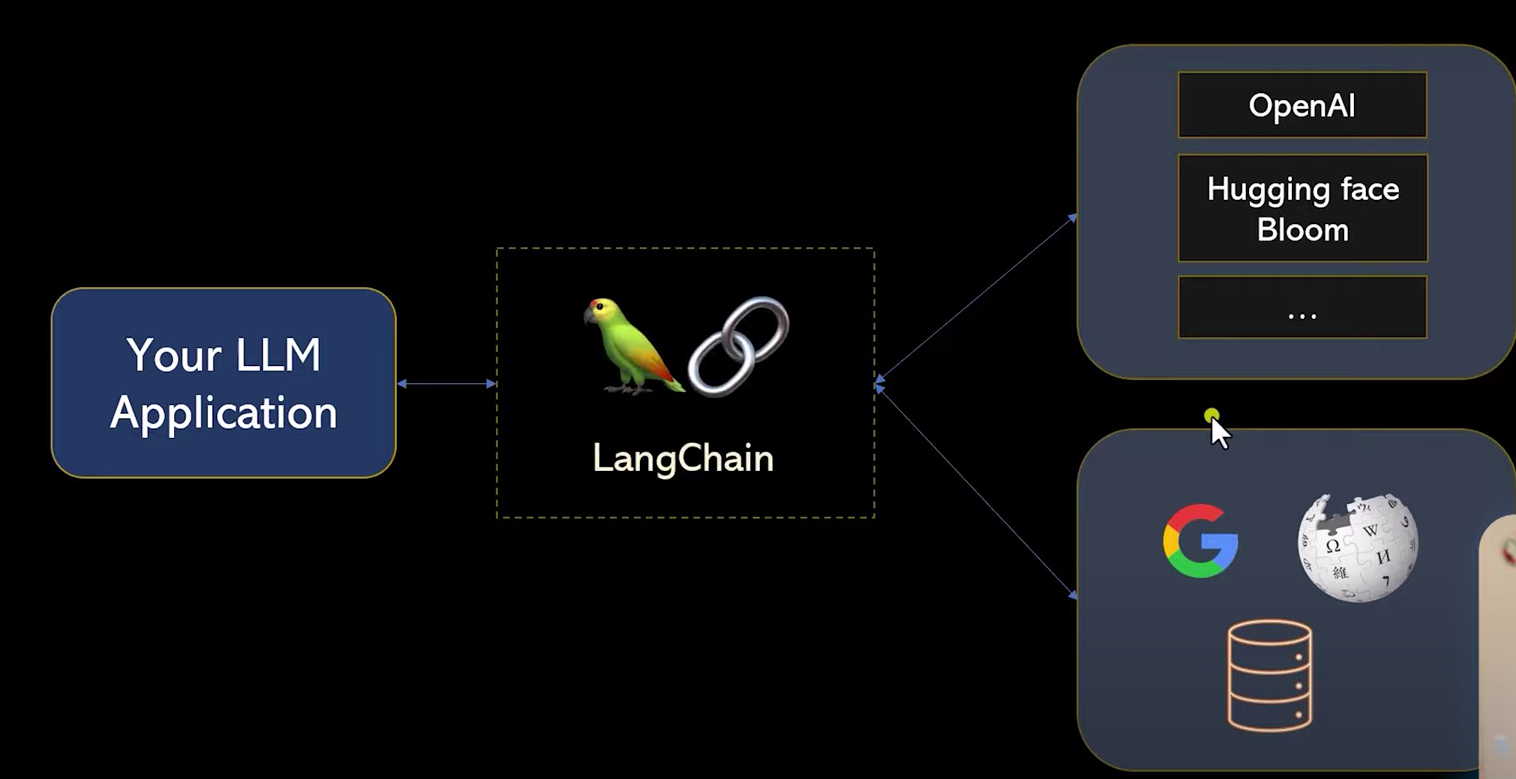

Setting up the openapi key 

In [5]:
from secret_key import openapi_key,serapi_key
import os
os.environ['OPENAI_API_KEY'] = openapi_key
os.environ['SERAPI_API_KEY'] = serapi_key


1. Installing the openai and langchain
`pip install openai`
`pip install langchain`

2. Setting up the API key of the openai with https://openai.com/

## LLMs

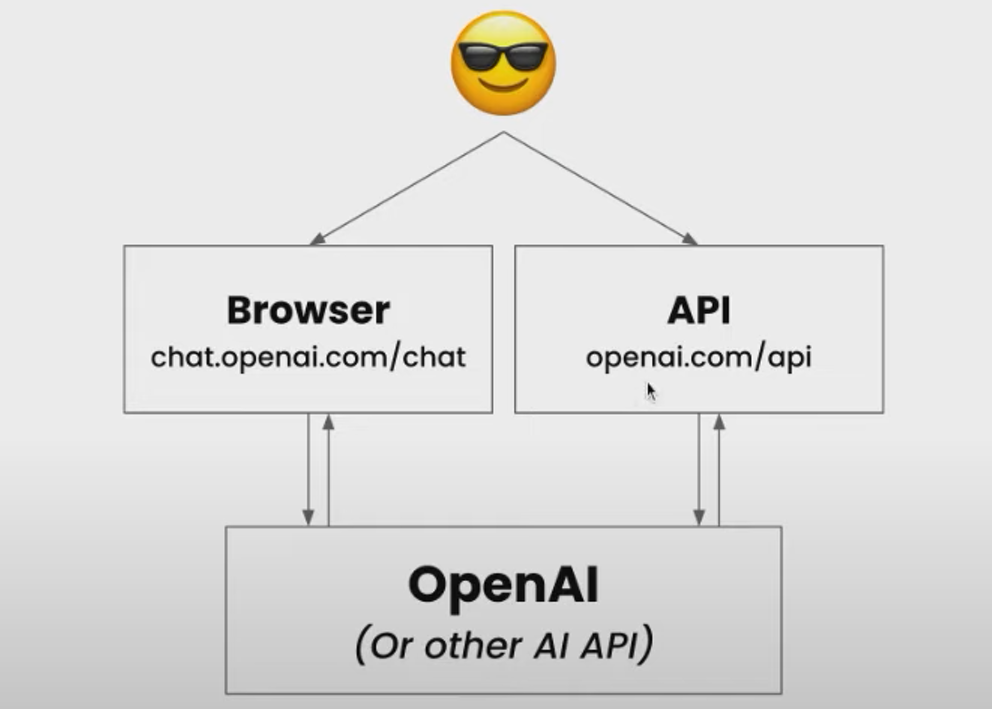
`temperature` is how confident and accurate the result is seeked upon

In [4]:
from langchain.llms import OpenAI

llm = OpenAI(temperature=0.9)
name = llm.predict("I want to open a restaurant for Indian food. Suggest a fency name for this.")
print(name)



Spice Express


The code imported openAI and creates a llm under this llm a simple query is passed upon

In [4]:
nepali_name = llm("I want to open a restaurant for Nepali food. Suggest a fency name for this.")
print(nepali_name)



Nepali Flavors


## Prompt Templates

As we can see that we are changing the type of dishes the process is being redundant, so we use prompt templates

In [5]:
from langchain.prompts import PromptTemplate
prompt_template_name = PromptTemplate(
    input_variables=['country'],
    template = "Suggest some {country} cuisine"
)
p = prompt_template_name.format(country='Hyderabadi')
print(p)

Suggest some Hyderabadi cuisine


In [8]:
print(llm.predict(p))



1. Hyderabadi Biryani 
2. Haleem 
3. Double ka Meetha 
4. Khubani ka Meetha 
5. Qubani ka Meetha 
6. Mirchi ka Salan 
7. Bagara Baigan 
8. Kachche Gosht ki Biryani 
9. Patthar Ka Gosht 
10. Talawa Gosht


## Chains

In [9]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt = prompt_template_name)
print(chain.run("Indian"))



1. Dosa
2. Butter Chicken
3. Tandoori Chicken
4. Samosa
5. Biryani
6. Dal Makhani
7. Masala Chai
8. Kebab
9. Pani Puri
10. Palak Paneer


In [10]:
chain = LLMChain (llm=llm, prompt = prompt_template_name,verbose =True)
print(chain.run("Korean"))



> Entering new LLMChain chain...
Prompt after formatting:
Suggest some Korean cuisine

> Finished chain.


1. Kimchi (김치)
2. Maelteruk (매운떡)
3. Bulgogi (불고기)
4. Japchae (잡채)
5. Bossam (보쌈)
6. Soondubu jjigae (순두부찌개)
7. Bindaetteok (빈대떡)
8. Doenjang jjigae (된장찌개)
9. Gimbap (김밥)
10. Samgyeopsal (삼겹살)


In [13]:
llm = OpenAI(temperature=0.6)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="""Suggest some menu items for {restaurant_name}"""
)

food_items_chain = LLMChain(llm=llm, prompt=prompt_template_items)

In [14]:
name_res = name_chain.run("Nepali")
name_res = name_res.strip()
name_res

'Namaste Nepal Cuisine'

In [15]:
print(food_items_chain.run(name_res))



1. Momo (Nepalese Steamed Dumplings)
2. Chicken Sekuwa (Nepalese Grilled Chicken)
3. Aloo Tama (Nepalese Potato Curry)
4. Sel Roti (Nepalese Sweet Rice Bread)
5. Choyela (Nepalese Grilled Lamb)
6. Dal Bhat (Nepalese Lentil Rice Dish)
7. Thukpa (Nepalese Noodle Soup)
8. Yomari (Nepalese Dumpling Filled with Molasses)
9. Gundruk (Nepalese Fermented Vegetable Soup)
10. Samay Baji (Nepalese Rice-Flour Pancake)


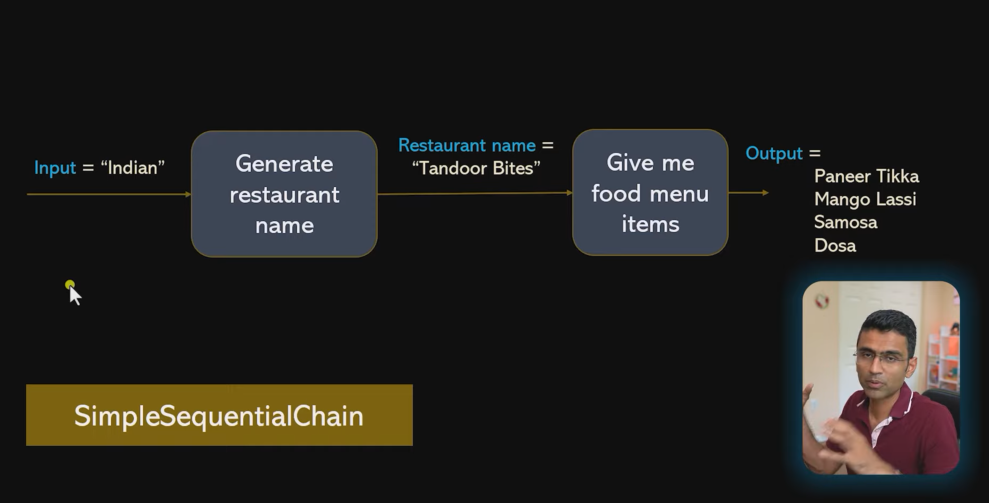

#### Simple Sequential Chain

In [19]:
from langchain.chains import SimpleSequentialChain
chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])

content = chain.run("Korean")
print(content)

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco



- Bibimbap
- Bulgogi
- Galbi 
- Japchae 
- Mandu 
- Kimchi 
- Fried Rice 
- Jjigae 
- Gamjatang 
- Tteokbokki 
- Haemul Pajeon 
- Pajeon 
- Kimbap


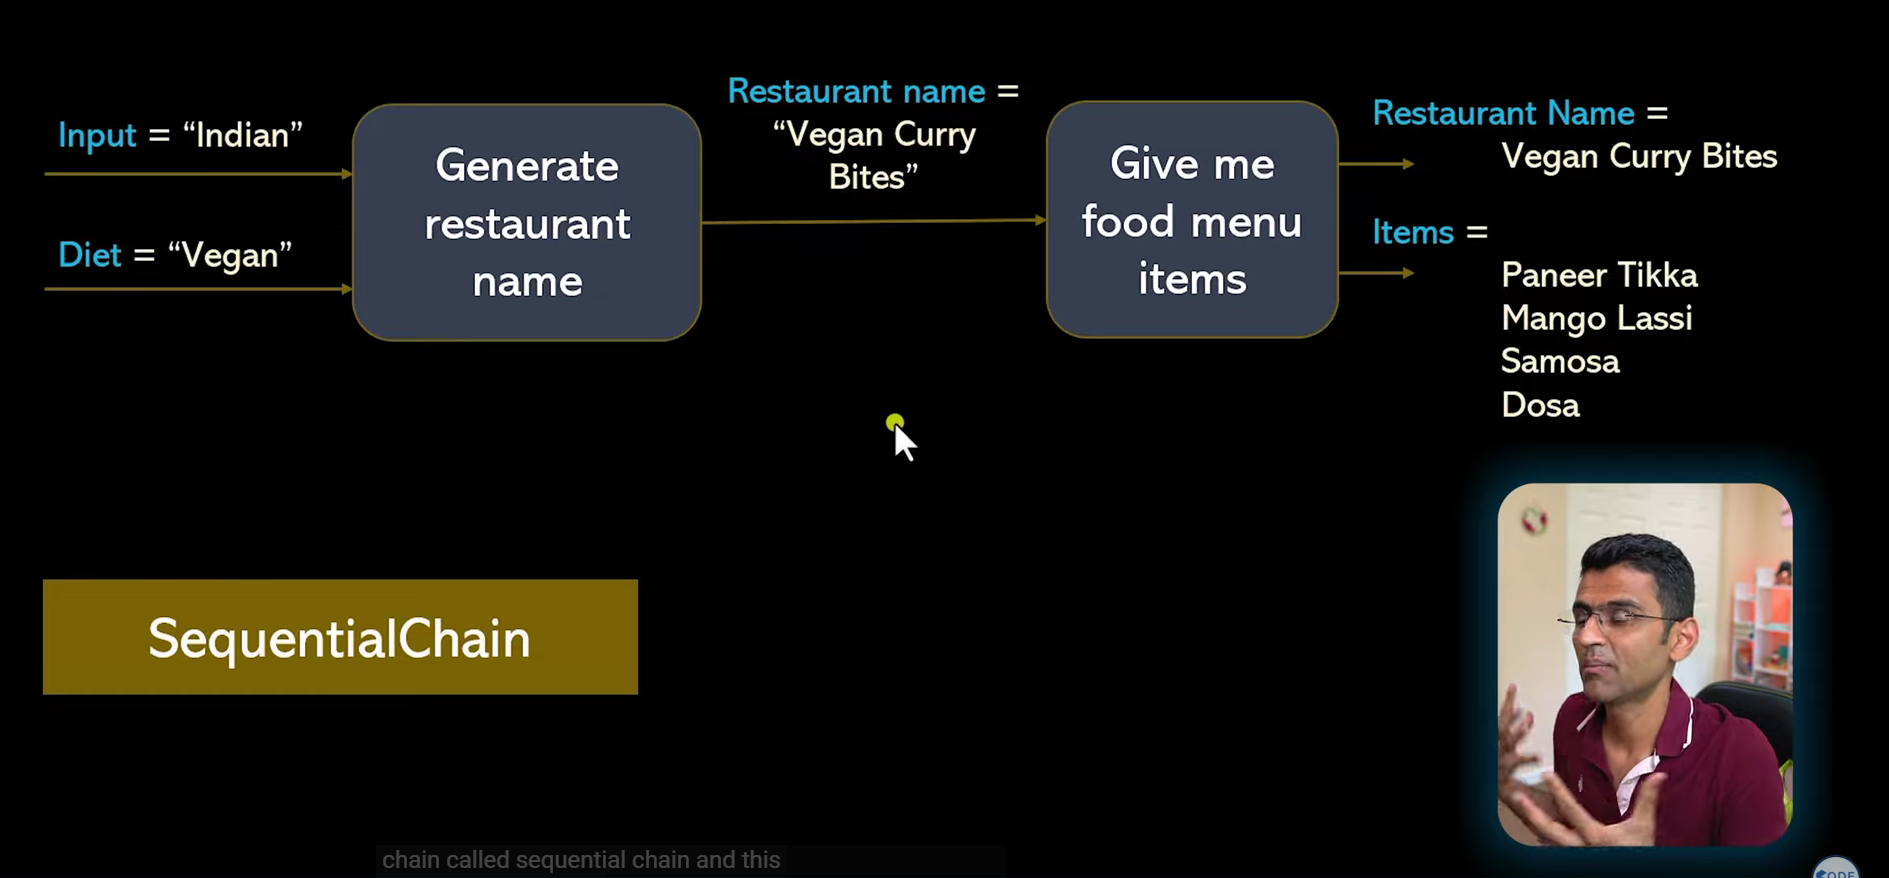

#### Sequential Chain

In [26]:
llm = OpenAI(temperature=0.7)
prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm, prompt=prompt_template_items, output_key="menu_items")

In [27]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [28]:
chain({"cuisine": "Indian"})

{'cuisine': 'Indian',
 'restaurant_name': "\n\nMaharaja's Palace",
 'menu_items': '\n\n-Mango Lassi\n-Chicken Tikka Masala\n-Lamb Biryani\n-Tandoori Paneer\n-Chaat Papri\n-Samosas\n-Kulfi\n-Gulab Jamun\n-Rasmalai\n-Chana Masala\n-Aloo Gobi\n-Paneer Makhani\n-Mutter Paneer\n-Naan Bread'}

In [25]:
print(chain({"cuisine": "Indian"})['restaurant_name'])

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco



Spice Labyrinth


In [29]:
print(chain({"cuisine": "Indian"})['menu_items'])



-Tandoori Chicken
-Butter Chicken
-Palak Paneer
-Biryani
-Samosas
-Aloo Gobi
-Naan
-Rogan Josh
-Korma
-Kheer
-Matar Paneer
-Chana Masala
-Jeera Aloo
-Malai Kofta
-Papdi Chaat
-Dal Makhani
-Pav Bhaji
-Mango Lassi


## Agents

Agent is a powerful concept in a Langchain
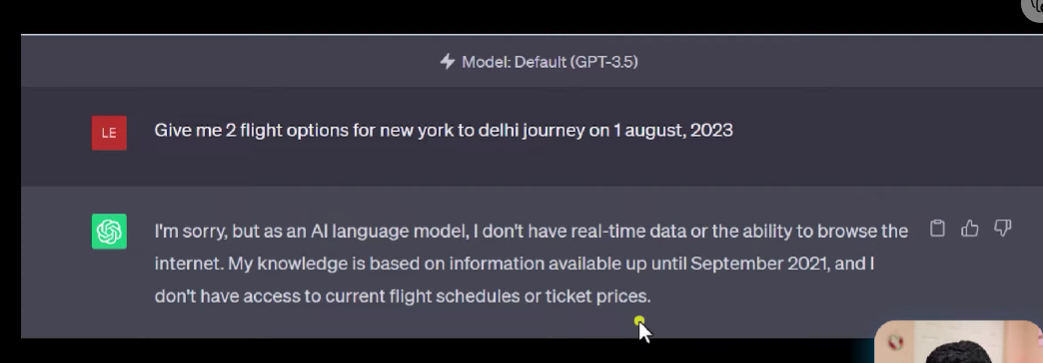
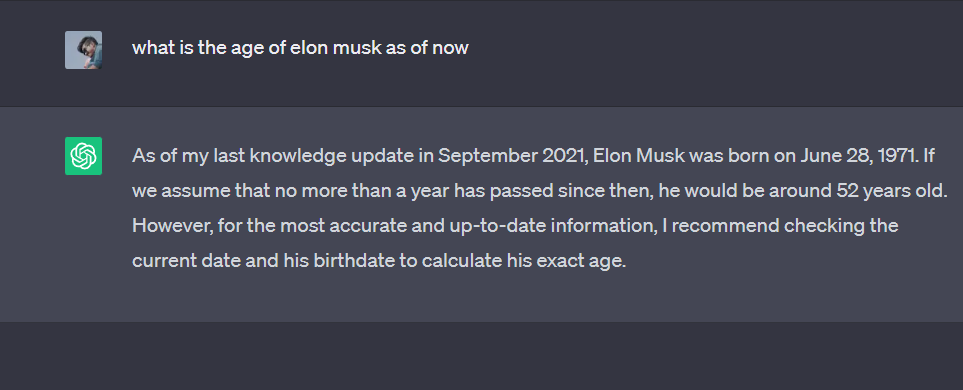
Agent is nothing but the reasoning capability of  LLM
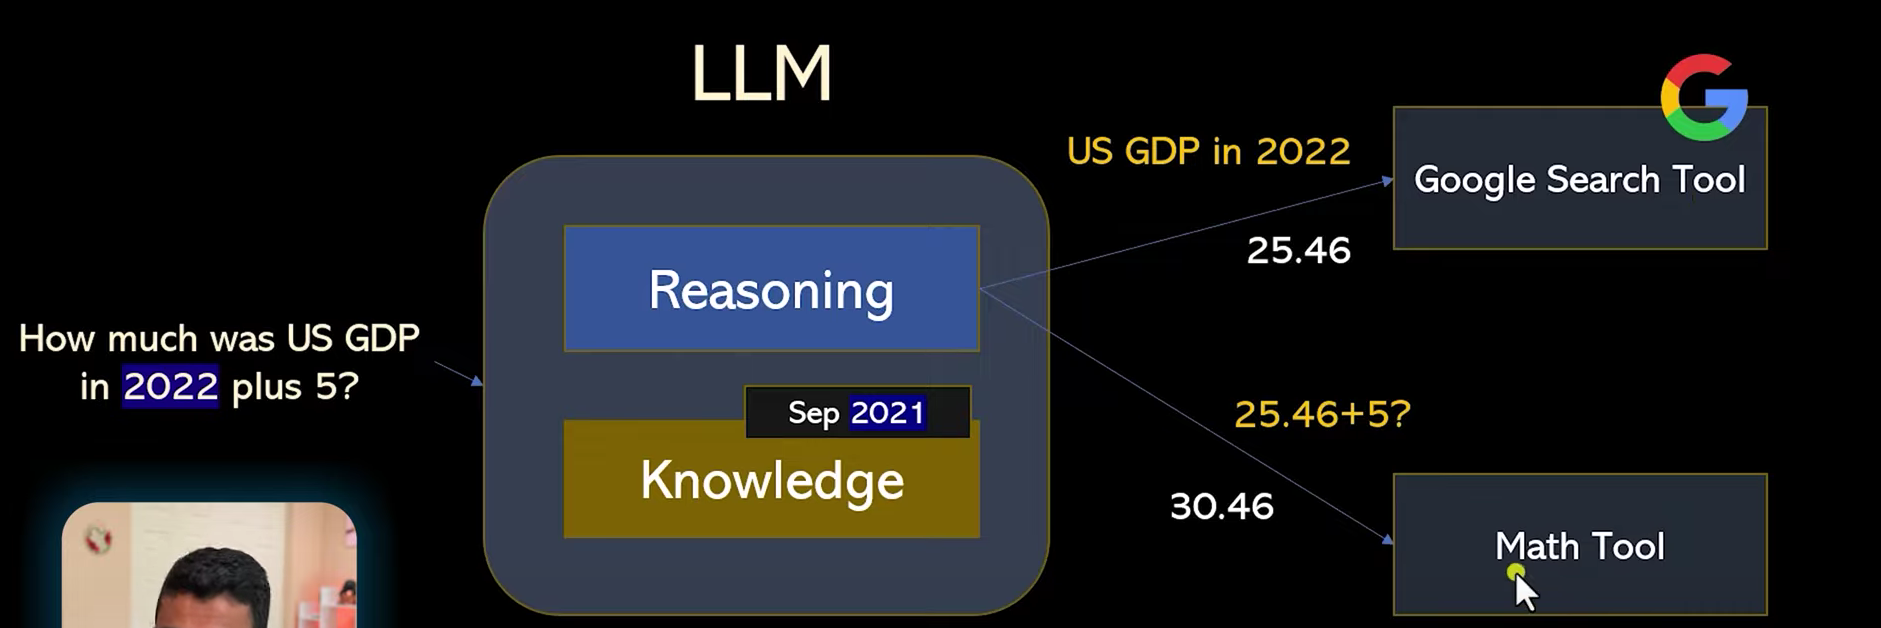

In [12]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
os.environ['SERPAPI_API_KEY']=serapi_key
tools = load_tools(["serpapi", "llm-math"], llm=llm)

In [13]:
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [14]:
# Now let's test it out!
agent.run("What is the age of the president of India?")



> Entering new AgentExecutor chain...
 I need to find out who the president of India is and then their age.
Action: Search
Action Input: "President of India"
Observation: Droupadi Murmu
Thought: I need to find out how old Droupadi Murmu is.
Action: Search
Action Input: "Droupadi Murmu age"
Observation: 65 years
Thought: I now know the final answer.
Final Answer: 65 years

> Finished chain.


'65 years'

In [15]:
# Now let's test it out!
agent.run("What is the Name of the president of India?")



> Entering new AgentExecutor chain...


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I need to find out who the current president of India is.
Action: Search
Action Input: "President of India"
Observation: Droupadi Murmu
Thought:

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco

 I now know the final answer
Final Answer: Droupadi Murmu is the President of India.

> Finished chain.


'Droupadi Murmu is the President of India.'

### Memory

In [17]:
from langchain import OpenAI, ConversationChain

In [18]:
llm = OpenAI(temperature=0)
conversation = ConversationChain(llm=llm, verbose=True)

In [19]:
conversation.predict(input="Namaste")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Namaste
AI:

> Finished chain.


" Namaste! It's nice to meet you. How can I help you today?"

In [20]:
conversation.predict(input="I'm doing well! Just having a conversation with an AI.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco


> Finished chain.


" That's great! It's always nice to have a conversation with someone new. What would you like to talk about?"

In [21]:
conversation.predict(input="What was the first thing I said to you?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco


> Finished chain.


' You said "Namaste"!'

In [22]:
conversation.predict(input="what is an alternative phrase for the first thing I said to you?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:  You said "Namaste"!
Human: what is an alternative phrase for the first thing I said to you?
AI:


Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-xDjxK3O2naZzvtFMMChWhYwt on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/acco


> Finished chain.


' An alternative phrase for "Namaste" could be "Greetings" or "Hello".'

In [23]:
conversation.predict(input="From where do you think I am texting you?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:  You said "Namaste"!
Human: what is an alternative phrase for the first thing I said to you?
AI:  An alternative phrase for "Namaste" could be "Greetings" or "Hello".
Human: From where do you think I am texting you?
AI:

> Finished chain.


" I'm not sure where you are texting me from."

In [24]:
conversation.predict(input="Can you guess?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:  You said "Namaste"!
Human: what is an alternative phrase for the first thing I said to you?
AI:  An alternative phrase for "Namaste" could be "Greetings" or "Hello".
Human: From where do you think I am texting you?
AI:  I'm not sure where you are texting me from.
Human: Can you guess?
AI:

> Finished chain.


"  I'm sorry, I don't have enough information to make an educated guess."

In [25]:
conversation.predict(input="Can you give me chessy lines to my nurse crush?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:  You said "Namaste"!
Human: what is an alternative phrase for the first thing I said to you?
AI:  An alternative phrase for "Namaste" could be "Greetings" or "Hello".
Human: From where do you think I am texting you?
AI:  I'm not sure where you are texting me from.
Human: Can you guess?
AI:   I'm sorry, I don't have enough information to make an educated guess.
Human: Can 

"  I'm sorry, I don't have enough information to provide you with cheesy lines for your nurse crush."

In [26]:
conversation.predict(input="What is the convex optimization")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Namaste
AI:  Namaste! It's nice to meet you. How can I help you today?
Human: I'm doing well! Just having a conversation with an AI.
AI:  That's great! It's always nice to have a conversation with someone new. What would you like to talk about?
Human: What was the first thing I said to you?
AI:  You said "Namaste"!
Human: what is an alternative phrase for the first thing I said to you?
AI:  An alternative phrase for "Namaste" could be "Greetings" or "Hello".
Human: From where do you think I am texting you?
AI:  I'm not sure where you are texting me from.
Human: Can you guess?
AI:   I'm sorry, I don't have enough information to make an educated guess.
Human: Can 

' Convex optimization is a type of mathematical optimization problem that involves minimizing a convex function over a convex set. It is used in many areas of engineering and science, including machine learning, robotics, and economics.'